In [1]:
#About the dataset

#Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

    #Pregnancies: Number of times pregnant
        
    #Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
       
   # BloodPressure: Diastolic blood pressure (mm Hg)
        
    #SkinThickness: Triceps skin fold thickness (mm)
        
    #Insulin: 2-Hour serum insulin (mu U/ml)
        
    #BMI: Body mass index (weight in kg/(height in m)^2)
        
    #DiabetesPedigreeFunction: Diabetes pedigree function
        
   # Age: Age (years)
        
   # Outcome: Class variable (0 or 1)


import the dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,mean_squared_error

In [3]:
diabetes=pd.read_csv("C:\\Users\\anujr\\OneDrive\\Documents\\data analyst\\ml raw data files\\diabetes.csv")

In [4]:
# check 1st 5 rows and last 5 rows
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
# this dataset only contains data of females

In [7]:
diabetes.shape # its show 768 rows and 9 columns

(768, 9)

In [8]:
diabetes.describe() #this gives a small summary about the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# let check for null and duplicate values

In [10]:
diabetes.isnull().sum().sum()

0

In [11]:
diabetes.duplicated().sum()

0

In [12]:
# there is no missing value and duplicate value

In [13]:
diabetes.info() # all columns consit numerical data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
# check names of columns

In [15]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [16]:
# Analyze the data

In [17]:
diabetes.groupby(['Outcome']).mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [18]:
# its show difference between both output


In [19]:
# count number of diabetes patient and non diabetes

In [20]:
diabetes["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [21]:
diabetes["Age"].value_counts().head(20)

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
Name: Age, dtype: int64

Text(0, 0.5, 'Number of Patients')

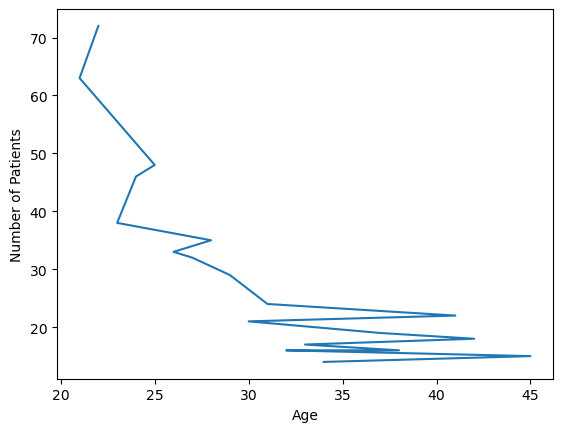

In [22]:
diabetes["Age"].value_counts().head(20).plot()
plt.xlabel("Age")
plt.ylabel("Number of Patients")

In [23]:
diabetes["Age"].value_counts().tail(20)

49    5
48    5
57    5
53    5
60    5
66    4
63    4
62    4
55    4
67    3
56    3
59    3
65    3
69    2
61    2
72    1
81    1
64    1
70    1
68    1
Name: Age, dtype: int64

Text(0, 0.5, 'Number of Patients')

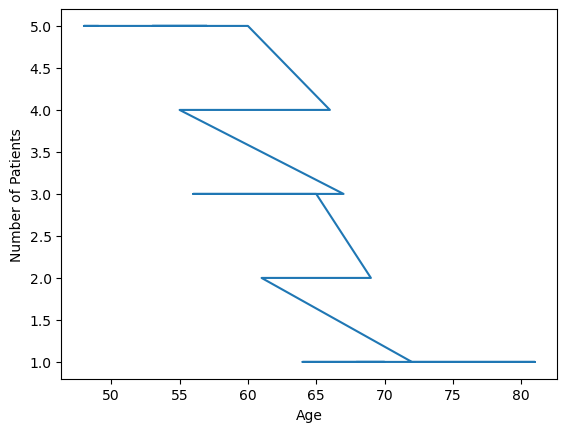

In [24]:

diabetes["Age"].value_counts().tail(20).plot()
plt.xlabel("Age")
plt.ylabel("Number of Patients")

In [25]:
diabetes["Pregnancies"].value_counts() # 0 means the Females who aren't Pregnant

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

<Axes: >

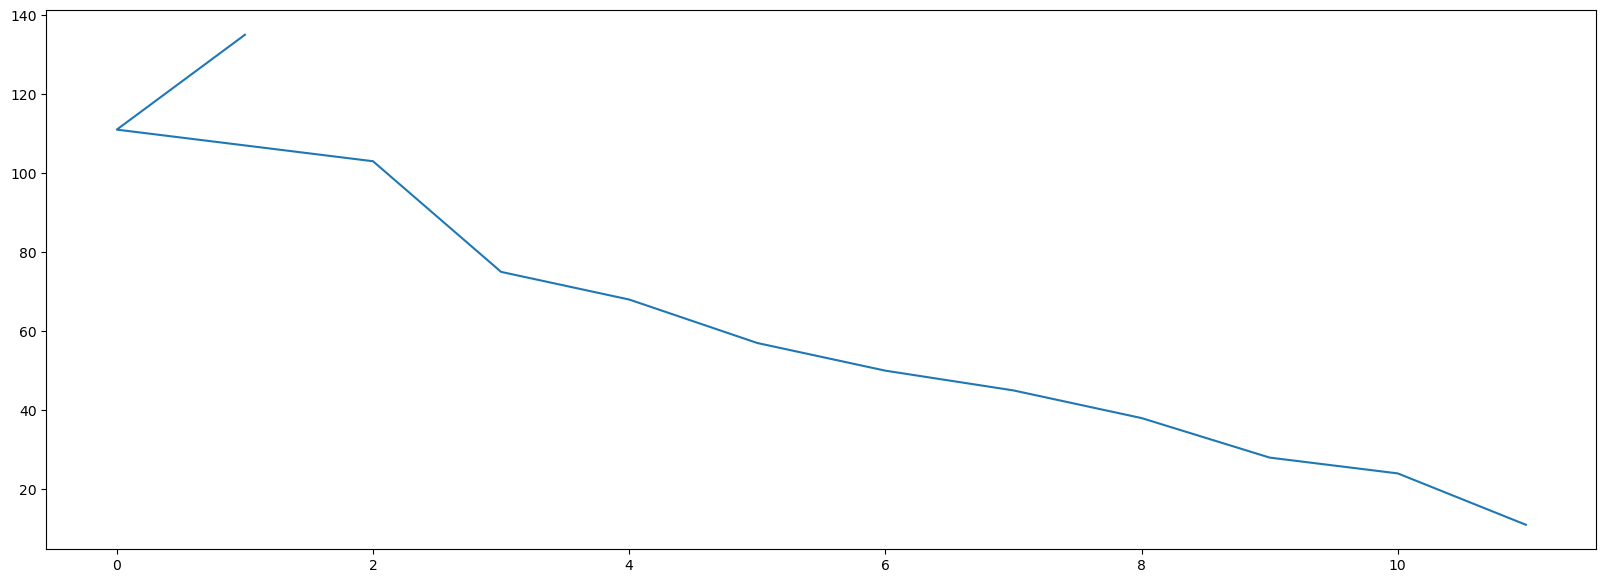

In [26]:
plt.figure(figsize=(20,7))
diabetes["Pregnancies"].value_counts().head(12).plot()

In [27]:
# Seperating the data and labels

In [28]:
x=diabetes.drop(["Outcome"],axis=1)

In [29]:
y=diabetes["Outcome"]

In [30]:
print(x,y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [31]:
# Standardize the data ..

In [32]:
sc=StandardScaler()

In [33]:
sc.fit(x)

StandardScaler()

In [34]:
x_sc=sc.transform(x)

In [35]:
x_sc

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [36]:
X=x_sc

In [37]:
Y=diabetes["Outcome"]

In [38]:
print(X,Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]] 0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [39]:
# Train and Test The DAta

In [40]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=51)

In [41]:
print(X.shape,x_train.shape,x_test.shape)

(768, 8) (614, 8) (154, 8)


In [42]:
print(Y.shape,y_train.shape,y_test.shape)

(768,) (614,) (154,)


In [69]:
# Create Model
model=SVC()

In [70]:
model.fit(x_train,y_train)

SVC()

In [71]:
x_train_1=model.predict(x_train)

In [72]:
acc1=accuracy_score(x_train_1,y_train)

In [73]:
print("Accuracy of model 1: ",acc1)

Accuracy of model 1:  0.8208469055374593


In [48]:
# Try kernal = linear

In [74]:
model1=SVC(kernel="linear")
model1.fit(x_train,y_train)
x_train_2=model1.predict(x_train)
acc2=accuracy_score(x_train_2,y_train)
print("Accuracy of model 1: ",acc2)

Accuracy of model 1:  0.7719869706840391


In [50]:
# TRy kernal = poly

In [75]:
model2=SVC(kernel="poly",degree=3)
model2.fit(x_train,y_train)
x_train_3=model2.predict(x_train)
acc3=accuracy_score(x_train_3,y_train)
print("Accuracy of model 1: ",acc3)

Accuracy of model 1:  0.8110749185667753


In [76]:
# check accuracy for test data

In [77]:
x_test_1=model.predict(x_test)
x_test_2=model1.predict(x_test)
x_test_3=model2.predict(x_test)
test_1_acc=accuracy_score(x_test_1,y_test)
test_2_acc=accuracy_score(x_test_2,y_test)
test_3_acc=accuracy_score(x_test_3,y_test)

In [78]:
print("accuracy of test 1:",test_1_acc)
print("accuracy of test 2:",test_2_acc)
print("accuracy of test 3:",test_3_acc)

accuracy of test 1: 0.7922077922077922
accuracy of test 2: 0.7857142857142857
accuracy of test 3: 0.7532467532467533


In [79]:
# model 1 Gives highest Accuracy in both training and testing data

In [80]:
# For model Prediction I picked model having kernel = rbf

# Make A Predictive System

In [81]:
# 1st Prediction
input_data=(0,147,85,54,0,42.8,0.375,24)
 # change data into np array
input_data_array=np.asarray(input_data)
#reshape it
input_data_reshape=input_data_array.reshape(1,-1)


prediction=model.predict(input_data_reshape)
print(prediction)
if (prediction[0]==0):
    print("The Person is not Diabetic")
else:
    print("The person is Diabetic")

[1]
The person is Diabetic


In [88]:
# 2nd Prediction
input_data2=(1,85,66,29,0,26.6,0.351,31)
 # change data into np array
input_data_array2=np.asarray(input_data2)
#reshape it
input_data_reshape2=input_data_array2.reshape(1,-1)



prediction2=model.predict(input_data_reshape2)
print(prediction2)
if (prediction2[0]==0):
    print("The Person is not Diabetic")
else:
    print("The person is Diabetic")

[1]
The person is Diabetic


In [84]:
model.predict(x_test)

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
      dtype=int64)

# Save the model

In [61]:
import pickle

In [ ]:
pickle.dump(model,open('model_diabetes.pkl','wb'))

# checking root mean squared error

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
mse=mean_squared_error(y_pred,y_test)

In [ ]:
mse

In [ ]:
rmse=np.sqrt(mse)

In [ ]:
rmse

In [59]:
filename="trained_model.sav"

In [62]:
pickle.dump(model,open(filename,'wb'))